In [2]:
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [3]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import os

In [4]:
def plot_3D(adata, Edges_3D, plot_gene, save=None, plot_elev=45, plot_azim=90, vmax=None, vmin=None):
    if (plot_gene in adata.obs.columns)==False:
        adata.obs[plot_gene] = adata[:,plot_gene].X.toarray()
    ##########画布设置###########
    fig = plt.figure(figsize=[5,6])
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_box_aspect(aspect = (2.2,1,1))

    ax.set_xlim([0, 6000])
    ax.set_ylim([0, 6000])
    ax.set_zlim([0, 500])
    plt.axis('off')
    #ax.set_title("Epidermal")


    ax.scatter(adata.obs['X_3D'], adata.obs['Y_3D'], adata.obs['Z_3D'].map(float), alpha=0.5, vmax=vmax, vmin=vmin, c=adata.obs[plot_gene],
               marker='o',s=10, linewidths=0,  cmap='Reds')

    #plt.legend()
    ax.scatter(Edges_3D['Aligned_X'], Edges_3D['Aligned_Y'], Edges_3D['Aligned_Z'], c='grey', marker='.', s=0.5, alpha=0.1)
    
    
    ax.view_init(elev=plot_elev, azim=plot_azim)

    if (save is None)==False:
        plt.savefig(save, dpi=300, bbox_inches='tight')

In [5]:
def plot_3D_FISH(adata, Edges_3D, plot_gene, save=None, plot_elev=-90, plot_azim=-90, vmax=None, vmin=None):
    if (plot_gene in adata.obs.columns)==False:
        adata.obs[plot_gene] = adata[:,plot_gene].X.toarray()
    ##########画布设置###########
    fig = plt.figure(figsize=[5,6])
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_box_aspect(aspect = (2.2,1,1))

    ax.set_xlim([0, 6000])
    ax.set_ylim([0, 3500])
    ax.set_zlim([0, 500])
    plt.axis('off')
    #ax.set_title("Epidermal")


    ax.scatter(adata.obs['X_3D'], adata.obs['Y_3D'], adata.obs['Z_3D'].map(float), alpha=0.5, vmax=vmax, vmin=vmin, c=adata.obs[plot_gene],
               marker='o',s=10, linewidths=0,  cmap='Reds')

    #plt.legend()
    ax.scatter(Edges_3D['Aligned_X'], Edges_3D['Aligned_Y'], Edges_3D['Aligned_Z'], c='grey', marker='.', s=0.5, alpha=0.1)
    
    
    ax.view_init(elev=plot_elev, azim=plot_azim)

    if (save is None)==False:
        plt.savefig(save, dpi=300, bbox_inches='tight')

In [6]:
def plot_2D(adata, plot_gene, save=None, temp_tp=None):
    if (plot_gene in adata.obs.columns)==False:
        adata.obs[plot_gene] = adata[:,plot_gene].X.toarray()
    section_list = ['A1', 'B1', 'C1', 'D1']
    
    adata_spatial = adata.copy()
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    it = 0
    for section_it in section_list:
        ad = adata_spatial[adata_spatial.obs.library_id == temp_tp+'_'+section_it, :].copy()
        if section_it == 'D1':
            sc.pl.spatial(
                ad,
                img_key="hires",
                color=plot_gene,
                library_id=temp_tp+'_'+section_it,
                size=1.5,
                show=False,
                ax=axs[it],
                title=section_it
            )
        else:
            sc.pl.spatial(
                ad,
                img_key="hires",
                color=plot_gene,
                library_id=temp_tp+'_'+section_it,
                size=1.5,
                legend_loc=None,
                show=False,
                ax=axs[it],
                title=section_it
            )
        it += 1
    #plt.suptitle(temp_title)
    if (save is None)==False:
        plt.savefig(save, dpi=300, bbox_inches='tight')

# Load Data

In [8]:
adata = sc.read('../../Data/Visium/Visium_12hpa.h5ad')
adata

AnnData object with n_obs × n_vars = 10156 × 27664
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'library_id', 'X_3D', 'Y_3D', 'Z_3D', 'Aligned_X', 'Aligned_Y', 'Aligned_Z', 'barcode', 'Section_id', 'AP_Info', 'cell2location_Epidermal', 'cell2location_Gut', 'cell2location_Muscle', 'cell2location_Neoblast', 'cell2location_Neuronal', 'cell2location_Parenchymal', 'cell2location_Secretory', 'STAGATE'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-cut12h_A1', 'mean_counts-cut12h_A1', 'log1p_mean_counts-cut12h_A1', 'pct_dropout_by_counts-cut12h_A1', 'total_counts-cut12h_A1', 'log1p_total_counts-cut12h_A1', 'n_cells_by_counts-cut12h_B1', 'mean_counts-cut12h_B1', 'log1p_mean_counts-cut12h_B1', 'pct_dropout_by_counts-cut12h_B1', 'total_counts-cut12h_B1', 'log1p_total_

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [10]:
Edges_3D = adata.uns['Edges_3D']

# plotting

In [11]:
Marker_list = ['SMED30031920', 'SMED30015345', 'SMED30004154', 'SMED30004868', 'SMED30024778']
Marker_Symbol = ['cml13', 'tpm1', 'rorb', 'ndf1', 'sbspon']

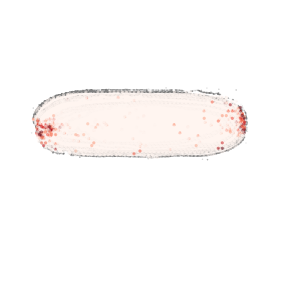

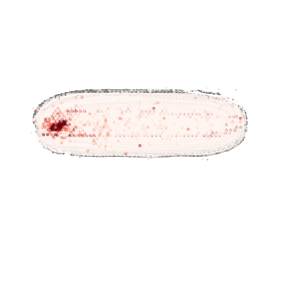

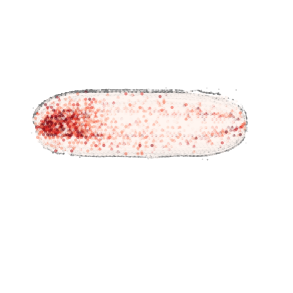

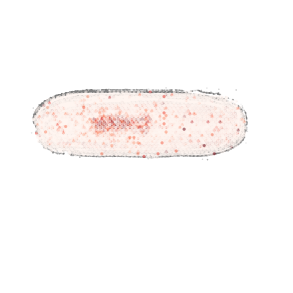

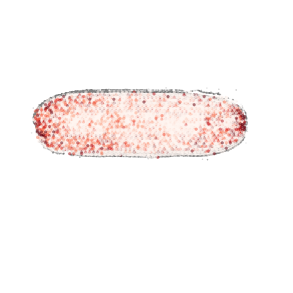

In [12]:
for it in range(len(Marker_list)):
    plot_gene = Marker_list[it]
    plot_symbol = Marker_Symbol[it]
    
    output_file = os.path.join('Images/12hpa/', plot_gene+' ('+plot_symbol+')_FISH.png')
    plot_3D_FISH(adata, Edges_3D, plot_gene, save=output_file, vmax=1)